“Predicting readmission rates of Diabetic patients using ML”

Data source: UCI Machine Learning Repository, 
https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008 


# Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()



ModuleNotFoundError: No module named 'google.colab'

In [2]:
dataset  = pd.read_csv('./dataset/dataset_diabetes/diabetic_data.csv')
dataset.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Understanding Dataset

In [3]:
dataset.shape

(101766, 50)

In [4]:
dataset.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [5]:
dataset.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [6]:
dataset.nunique()
dataset.describe().apply(lambda s:s.apply(lambda x: format(x,'f')))

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,165201645.622978,54330400.694947,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,102640295.983458,38696359.346534,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,12522.000000,135.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,84961194.000000,23413221.000000,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,152388987.000000,45505143.000000,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,230270887.500000,87545949.750000,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,443867222.000000,189502619.000000,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


# Feature Engineering

In [7]:
# Droping columns encounter_id,patient_nbr,payer_Code - irrelevant to analysis
dataset = dataset.drop(['encounter_id','patient_nbr','payer_code'],axis=1)

In [8]:
print('Weight details: \n',dataset.weight.value_counts())
print('\n Medical Speciality: \n',dataset.medical_specialty.value_counts())

Weight details: 
 ?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

 Medical Speciality: 
 ?                                   49949
InternalMedicine                    14635
Emergency/Trauma                     7565
Family/GeneralPractice               7440
Cardiology                           5352
                                    ...  
Psychiatry-Addictive                    1
Dermatology                             1
SportsMedicine                          1
Surgery-PlasticwithinHeadandNeck        1
Neurophysiology                         1
Name: medical_specialty, Length: 73, dtype: int64


In [9]:
# More than 50% of the values in weight and medical speciality are ? drop the columns
dataset = dataset.drop(['weight','medical_specialty'],axis =1)

#  Since I have no need for diagnosis in my analysis for time being dropping those columns
dataset = dataset.drop(['diag_1','diag_2','diag_3','admission_type_id','discharge_disposition_id',
            'admission_source_id'],axis =1)

In [10]:
dataset = dataset.replace('?',np.nan)

In [11]:
dataset['race'] = dataset.race.fillna(value='Other')

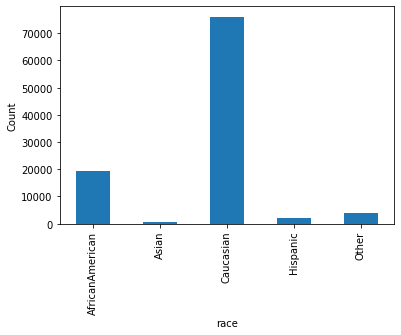

In [12]:
dataset.groupby('race').size().plot(kind = 'bar')
plt.ylabel('Count')
plt.show()

In [13]:
age_replace = {'[0-10)':5,
              '[10-20)':15,
              '[20-30)':25,
              '[30-40)':35, 
          '[40-50)':45, 
          '[50-60)':55,
          '[60-70)':65, 
          '[70-80)':75, 
          '[80-90)':85, 
          '[90-100)':95}
dataset['age'] = dataset.age.replace(age_replace)
dataset.age

0          5
1         15
2         25
3         35
4         45
          ..
101761    75
101762    85
101763    75
101764    85
101765    75
Name: age, Length: 101766, dtype: int64

In [14]:
# Calculating the percentage of value counts in a particular column and taking out columns that have atleast some percent of steady or not-none values
plt_list = ['max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide','chlorpropamide',
           'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

for i in plt_list:
    crux = (dataset[i].value_counts()/dataset[i].count())*100
    print('\n',i,'Total count in percent : \n',crux,'\n')
    


 max_glu_serum Total count in percent : 
 None    94.746772
Norm     2.551933
>200     1.459230
>300     1.242065
Name: max_glu_serum, dtype: float64 


 A1Cresult Total count in percent : 
 None    83.277322
>8       8.073423
Norm     4.903406
>7       3.745848
Name: A1Cresult, dtype: float64 


 metformin Total count in percent : 
 No        80.358862
Steady    18.027632
Up         1.048484
Down       0.565022
Name: metformin, dtype: float64 


 repaglinide Total count in percent : 
 No        98.487707
Steady     1.359983
Up         0.108091
Down       0.044219
Name: repaglinide, dtype: float64 


 nateglinide Total count in percent : 
 No        99.309200
Steady     0.656408
Up         0.023584
Down       0.010809
Name: nateglinide, dtype: float64 


 chlorpropamide Total count in percent : 
 No        99.915492
Steady     0.077629
Up         0.005896
Down       0.000983
Name: chlorpropamide, dtype: float64 


 glimepiride Total count in percent : 
 No        94.899082
Steady     

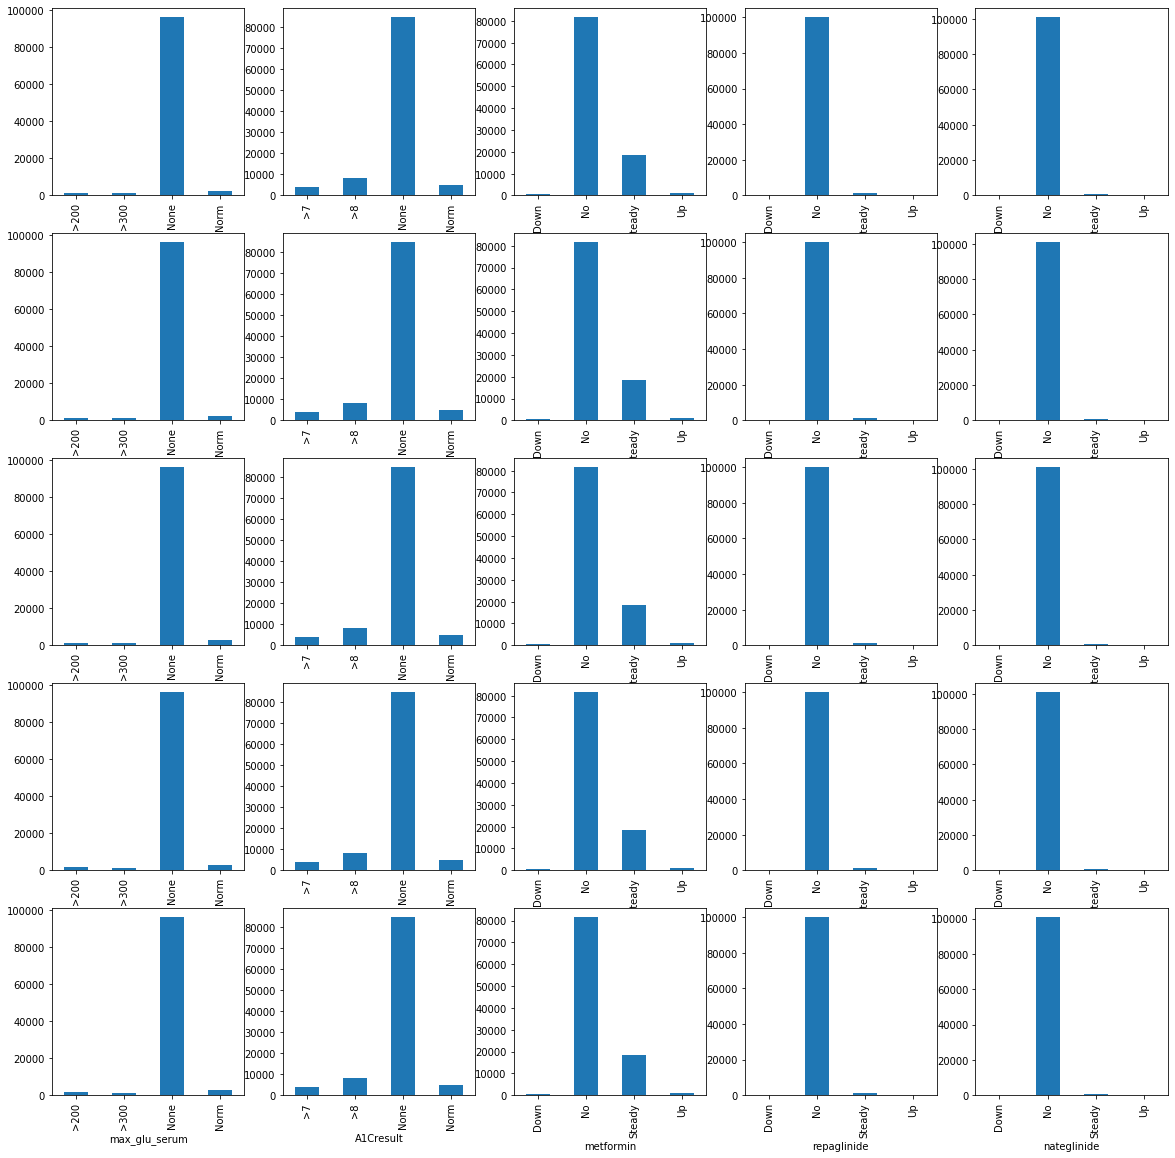

In [15]:
nrows = 5
ncols = 5
fig, axes = plt.subplots(nrows,ncols,figsize=(20,20))
for i in range(nrows):
    for j in range(ncols):
        dataset.groupby(plt_list[j]).size().plot(kind='bar',ax=axes[i,j])
        plt.xlabel(plt_list[j])
        j =+1

In [16]:
cols_with_none = ['repaglinide','nateglinide','chlorpropamide','acetohexamide','tolbutamide',
                 'acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','glyburide-metformin',
                 'glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']
cols_with_weight = ['max_glu_serum','A1Cresult','metformin','glimepiride','glipizide','glyburide','pioglitazone',
                   'rosiglitazone','insulin']

In [17]:
# Droping the columns which have No values compared to other
dataset = dataset.drop(cols_with_none,axis=1)

In [18]:
dataset[cols_with_weight] = dataset[cols_with_weight].apply(lambda x: x.astype('category'))

In [19]:
dataset.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,Caucasian,Female,5,1,41,0,1,0,0,0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,15,3,59,0,18,0,0,0,...,No,No,No,No,No,No,Up,Ch,Yes,>30
2,AfricanAmerican,Female,25,2,11,5,13,2,0,1,...,No,No,Steady,No,No,No,No,No,Yes,NO
3,Caucasian,Male,35,2,44,1,16,0,0,0,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,Caucasian,Male,45,1,51,0,8,0,0,0,...,No,No,Steady,No,No,No,Steady,Ch,Yes,NO


In [20]:
dataset.shape

(101766, 23)

In [21]:
# Droping all the rows with NA values
dataset = dataset.dropna(axis=0)

# Categorical Features to Numerical Data

In [22]:
cat_list = ['race', 'gender', 'change', 'diabetesMed']

dataset[cat_list] = dataset[cat_list].apply(lambda x:x.astype('category'))

dataset[cat_list] = dataset[cat_list].apply(lambda x:x.cat.codes)
dataset[cols_with_weight] = dataset[cols_with_weight].apply(lambda x:x.cat.codes)

In [23]:
dataset.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,2,0,5,1,41,0,1,0,0,0,...,1,1,1,1,1,1,1,1,0,NO
1,2,0,15,3,59,0,18,0,0,0,...,1,1,1,1,1,1,3,0,1,>30
2,0,0,25,2,11,5,13,2,0,1,...,1,1,2,1,1,1,1,1,1,NO
3,2,1,35,2,44,1,16,0,0,0,...,1,1,1,1,1,1,3,0,1,NO
4,2,1,45,1,51,0,8,0,0,0,...,1,1,2,1,1,1,2,0,1,NO


# Relationship between Features

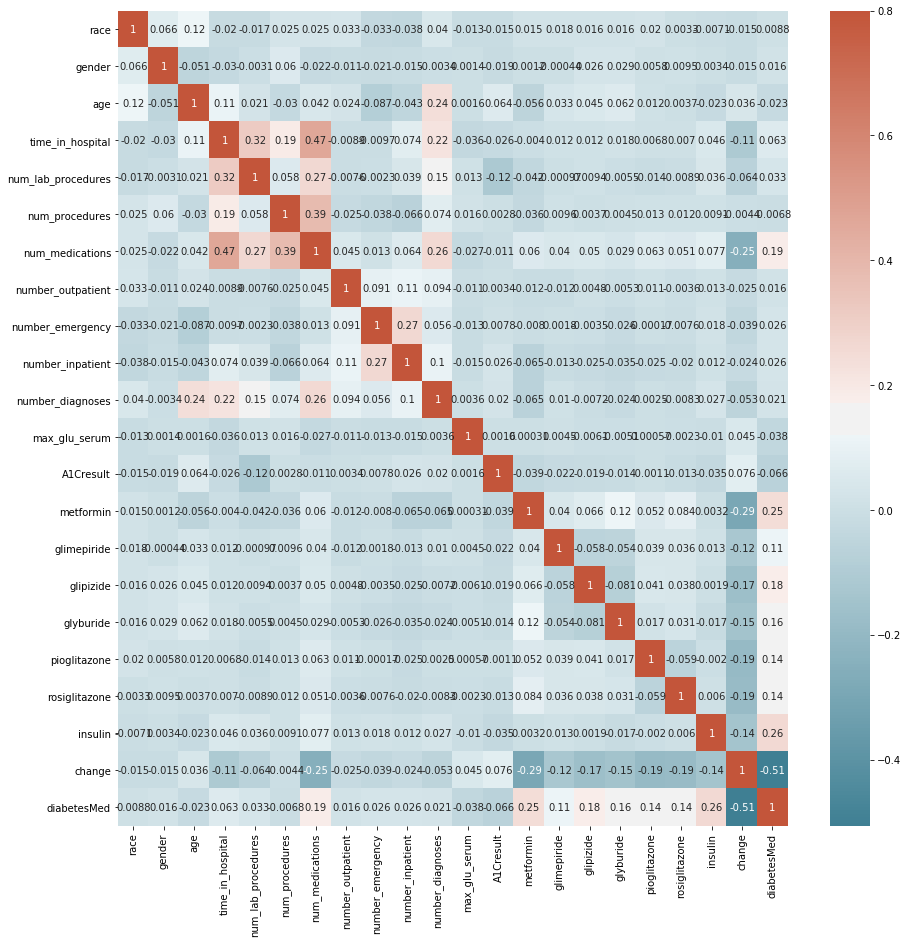

In [24]:
# Calculating correlation matrix and plotting the heatmap
corr = dataset.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            annot=True, vmax=.8,cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

Number of medications used is highly correlated with time spent in the hospital (may be mostly readmitted patients)
Number of procedures is correlated to number of medications used. This makes sense as the time spent in hospital increases  for a admitted patient, the number of procedures and number of medications used to test the diagnosis to control diabeties increases.


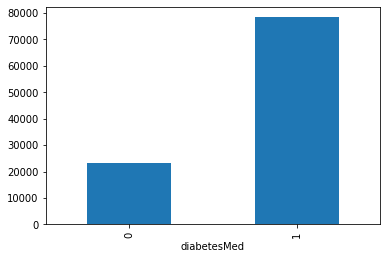

In [25]:
# Visulaizing the grouped DiabetesMed data
dataset.groupby('diabetesMed').size().plot(kind='bar')
plt.show()

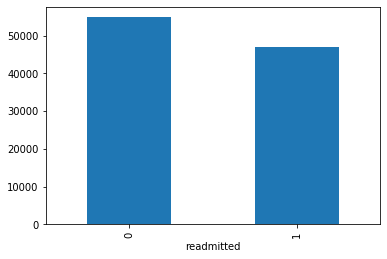

In [26]:
# Visulazing the readmitted data in terms of 0(No) & 1(Readmitted)
dataset['readmitted'] = pd.Series(0 if i== 'NO' else 1 for i in dataset.readmitted)
dataset.groupby('readmitted').size().plot(kind='bar')
plt.show()

Most of the patients using diabetesMedicine aren't readmitted.

# Feature Scaling

<Figure size 1008x432 with 0 Axes>

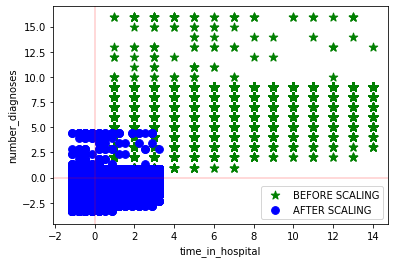

In [27]:
# Standardized to have zero mean and unit variance
# Picking cols with correlation greater than 0.2
# Data is standardized to zero mean and unit variance so that there isn't much difference in values of different features.
# By standardizing, feature values are equally distributated along a Standard Normal Distribution Curve.

cols_with_positive_corr = ['time_in_hospital','num_lab_procedures','num_procedures',
                          'num_medications','number_emergency','number_inpatient','number_diagnoses',
                          ]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(dataset[cols_with_positive_corr]),
                   columns=cols_with_positive_corr,
                   index = dataset.index)
plt.figure(figsize=(14,6))
ax = dataset.plot.scatter(x='time_in_hospital', y='number_diagnoses', c='green',
                     marker = '*',s=80, label='BEFORE SCALING');
df.plot.scatter(x='time_in_hospital', y='number_diagnoses',c='blue',
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax)
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)
plt.show()

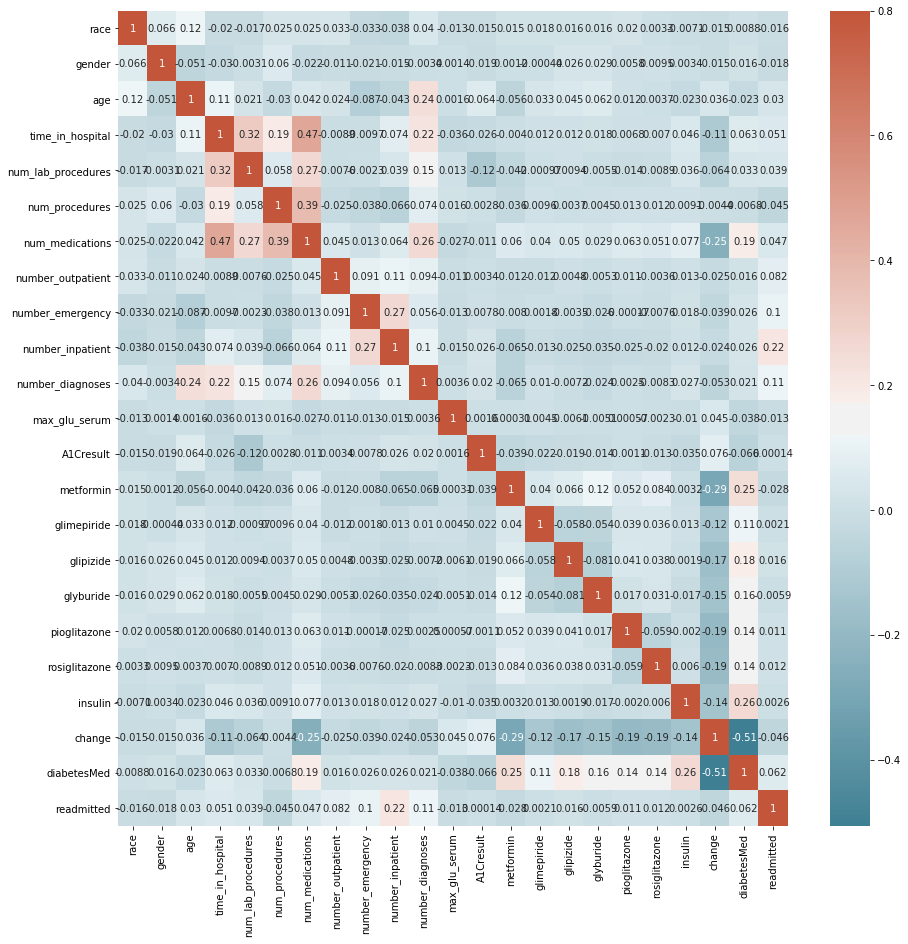

In [28]:
# Plotting the heatmap
corr = dataset.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            annot=True, vmax=.8,cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

In [29]:
dataset.drop(dataset[cols_with_positive_corr],axis=1,inplace=True)
dataset = pd.concat([dataset,df],axis=1)

In [30]:
y = dataset['readmitted']
X = dataset.drop(['readmitted'],axis=1)
X = pd.get_dummies(X)

### Analysing different models to check which model proves for highest accuracy.

In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

print("Shape of Xtrain,Xtest:",X_train.shape,X_test.shape)

Shape of Xtrain,Xtest: (71236, 22) (30530, 22)


In [32]:
# Implementing Logistic Regression Algorithm

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression().fit(X_train,y_train)
pred = clf.predict(X_test)

print('Logistic Regression Accuracy :', clf.score(X_test,y_test)*100)

Logistic Regression Accuracy : 61.81133311496888


C:\Users\sumed\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [33]:
# checking the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
print(confusion_matrix(y_test, pred))

[[13333  3136]
 [ 8523  5538]]


In [34]:
print('True Positive: ',cm[0][0])
print('True Negative: ',cm[1][0])
print('False Positive: ',cm[0][1])
print('False Negative: ',cm[1][1])

True Positive:  13333
True Negative:  8523
False Positive:  3136
False Negative:  5538


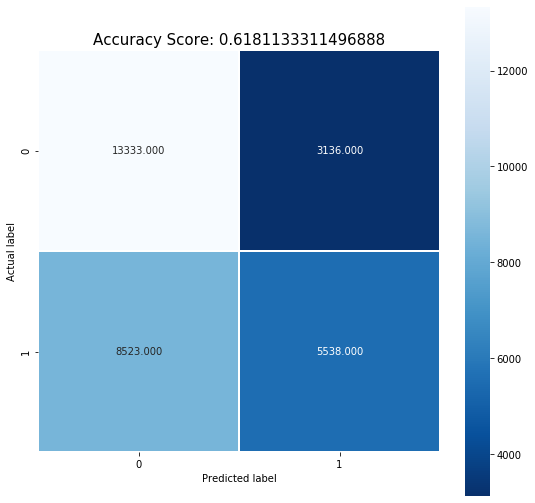

In [35]:
# Plotting the confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(clf.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.61      0.81      0.70     16469
           1       0.64      0.39      0.49     14061

    accuracy                           0.62     30530
   macro avg       0.62      0.60      0.59     30530
weighted avg       0.62      0.62      0.60     30530



In [37]:
# Implementing Support Vector Machine
from sklearn import svm
slf = svm.SVC(kernel='linear')

# This is formatted as code


slf.fit(X_train, y_train)
svc_pred = slf.predict(X_test)
svc_cm = confusion_matrix(y_test,svc_pred)
print('----------Support Vector Machine Accuracy:----------\n',accuracy_score(y_test,svc_pred)*100)
print('\n----------Confusion Matrix:----------\n',svc_cm)
print('\n----------Classification Matrix:----------\n',classification_report(y_test,svc_pred))

----------Support Vector Machine Accuracy:----------
 60.38650507697347

----------Confusion Matrix:----------
 [[14596  1873]
 [10221  3840]]

----------Classification Matrix:----------
               precision    recall  f1-score   support

           0       0.59      0.89      0.71     16469
           1       0.67      0.27      0.39     14061

    accuracy                           0.60     30530
   macro avg       0.63      0.58      0.55     30530
weighted avg       0.63      0.60      0.56     30530



In [38]:
# Implementing K-Nearest Neighbors Algorithm

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10).fit(X_train,y_train)
knn_pred = knn.predict(X_test)
knn_cm = confusion_matrix(y_test,knn_pred)
print('----------K-Nearest Neighbors Accuracy:---------- \n',accuracy_score(y_test,knn_pred)*100)
print('\n----------Confusion Matrix:---------- \n',knn_cm)
print('\n----------Classification Matrix:---------- \n',classification_report(y_test,knn_pred))

----------K-Nearest Neighbors Accuracy:---------- 
 58.30330822142156

----------Confusion Matrix:---------- 
 [[12499  3970]
 [ 8760  5301]]

----------Classification Matrix:---------- 
               precision    recall  f1-score   support

           0       0.59      0.76      0.66     16469
           1       0.57      0.38      0.45     14061

    accuracy                           0.58     30530
   macro avg       0.58      0.57      0.56     30530
weighted avg       0.58      0.58      0.57     30530



In [39]:
# Implementing Gaussian Naive Bayes Algorithm

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)
gnb_cm = confusion_matrix(y_test,gnb_pred)
print('----------Naive Bayes Accuracy:---------- \n',accuracy_score(y_test,gnb_pred)*100)
print('\n----------Confusion Matrix:---------- \n',gnb_cm)
print('\n----------Classification Matrix:---------- \n',classification_report(y_test,gnb_pred))


----------Naive Bayes Accuracy:---------- 
 59.420242384539804

----------Confusion Matrix:---------- 
 [[14571  1898]
 [10491  3570]]

----------Classification Matrix:---------- 
               precision    recall  f1-score   support

           0       0.58      0.88      0.70     16469
           1       0.65      0.25      0.37     14061

    accuracy                           0.59     30530
   macro avg       0.62      0.57      0.53     30530
weighted avg       0.61      0.59      0.55     30530



In [40]:
# Implementing DecisionTreeClassifier Algorithm

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=10,random_state=2).fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)
dtc_cm = confusion_matrix(y_test, dtc_pred)
print('----------Decision Tree Accuracy:----------\n', accuracy_score(y_test,dtc_pred)*100)
print('\n----------Confusion Matrix:---------- \n',dtc_cm)
print('\n----------Classification Matrix:----------\n',classification_report(y_test,dtc_pred))

----------Decision Tree Accuracy:----------
 61.17589256469047

----------Confusion Matrix:---------- 
 [[11950  4519]
 [ 7334  6727]]

----------Classification Matrix:----------
               precision    recall  f1-score   support

           0       0.62      0.73      0.67     16469
           1       0.60      0.48      0.53     14061

    accuracy                           0.61     30530
   macro avg       0.61      0.60      0.60     30530
weighted avg       0.61      0.61      0.61     30530



In [41]:
# Implementing RandomForestClassifier Algorithm
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth = 2 , random_state=0).fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
dtc_cm = confusion_matrix(y_test, rfc_pred)
print('----------Random Forest Accuracy:----------\n',accuracy_score(y_test,rfc_pred)*100)
print('\n----------Confusion Matrix:----------\n',dtc_cm)
print('\n----------Classification Matrix:----------\n',classification_report(y_test,dtc_pred))

----------Random Forest Accuracy:----------
 61.650835244022275

----------Confusion Matrix:----------
 [[12937  3532]
 [ 8176  5885]]

----------Classification Matrix:----------
               precision    recall  f1-score   support

           0       0.62      0.73      0.67     16469
           1       0.60      0.48      0.53     14061

    accuracy                           0.61     30530
   macro avg       0.61      0.60      0.60     30530
weighted avg       0.61      0.61      0.61     30530



#### Feature Importance with Random Forest Classifier

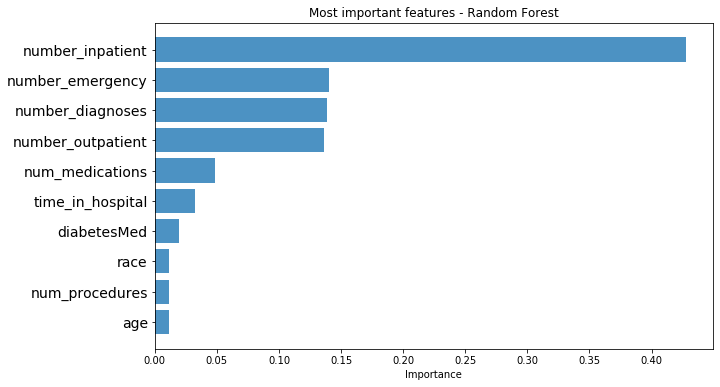

In [42]:
feature_names = X_train.columns
feature_imp = rfc.feature_importances_
featureDF = pd.DataFrame([f for f in zip(feature_names,feature_imp)],columns=['Features','Importance']).nlargest(10,"Importance")
featureDF.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(featureDF)), featureDF.Importance, align='center', alpha=0.8)
plt.yticks(range(len(featureDF)), featureDF.Features, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest')
plt.show()

In [43]:
# Implementing GraidentBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gbc = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gbc_pred = gbc.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (Training): {0:.3f}".format(gbc.score(X_train, y_train)*100))
    print("Accuracy score (Testing): {0:.3f}".format(gbc.score(X_test, y_test)*100))

Learning rate:  0.05
Accuracy score (Training): 60.003
Accuracy score (Testing): 60.020
Learning rate:  0.1
Accuracy score (Training): 61.870
Accuracy score (Testing): 61.775
Learning rate:  0.25
Accuracy score (Training): 62.196
Accuracy score (Testing): 62.014
Learning rate:  0.5
Accuracy score (Training): 62.346
Accuracy score (Testing): 62.060
Learning rate:  0.75
Accuracy score (Training): 62.446
Accuracy score (Testing): 62.018
Learning rate:  1
Accuracy score (Training): 62.355
Accuracy score (Testing): 62.001


# Hyperparameters Tuning for Gradient Boosting

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gb_classifier = GradientBoostingClassifier(n_estimators=20,learning_rate=0.75,random_state=42)

grid_prm = {
    'n_estimators':[100,200,300,400],
    'learning_rate':[0.2,0.5,0.75,1.0]
}
gb_grid = GridSearchCV(gb_classifier, cv=4, n_jobs=4, param_grid=grid_prm)
gb_grid.fit(X_train,y_train)

print('----------Gradient Boosting Classifier Accuracy:----------\n',gb_grid.score(X_test,y_test)*100)
gb_pred = gb_grid.predict(X_test)

print('\n----------Classification Report:----------\n',classification_report(y_test,gb_pred,target_names=['No','Yes']))

----------Gradient Boosting Classifier Accuracy:----------
 62.7088110055683

----------Classification Report:----------
               precision    recall  f1-score   support

          No       0.63      0.75      0.68     16469
         Yes       0.62      0.48      0.54     14061

    accuracy                           0.63     30530
   macro avg       0.63      0.62      0.61     30530
weighted avg       0.63      0.63      0.62     30530



In [55]:
from sklearn.metrics import roc_curve

ygb_pred = gb_grid.decision_function(X_test)
gbclass_fpr,gbclass_tpr,gbclass_threshold = roc_curve(y_test,ygb_pred)

### ROC Curves and AUC 

In [46]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


# generating a no skill prediction (majority class)
noskill_probs = [0 for _ in range(len(y_test))]
noskill_auc = roc_auc_score(y_test, noskill_probs)
print('No Skill: ROC AUC=%.3f' % (noskill_auc))
noskill_fpr, noskill_tpr, _ = roc_curve(y_test, noskill_probs)

#Logistic Regression
LR_probs = clf.predict_proba(X_test)
LR_probs = LR_probs[:, 1]
LR_auc = roc_auc_score(y_test, LR_probs)
print('Logistic: ROC AUC=%.3f' % (LR_auc))
LR_fpr, LR_tpr, _ = roc_curve(y_test, LR_probs)

#SVM
svm_probs = slf.predict_proba(X_test,probability=True)
svm_probs = svm_probs[:, 1]
svm_auc = roc_auc_score(y_test, svm_probs)
print('Support Vector Machine: ROC AUC=%.3f' % (svm_auc))
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

#K-Nearest Neighbors
KNN_probs = knn.predict_proba(X_test)
KNN_probs = KNN_probs[:, 1]
KNN_auc = roc_auc_score(y_test, KNN_probs)
print('K-Nearest Neighbor: ROC AUC=%.3f' % (KNN_auc))
KNN_fpr, KNN_tpr, _ = roc_curve(y_test, KNN_probs)

#Gaussian Naive Bayes 
GNB_probs = gnb.predict_proba(X_test)
GNB_probs = GNB_probs[:, 1]
GNB_auc = roc_auc_score(y_test, GNB_probs)
print('Gaussian: ROC AUC=%.3f' % (GNB_auc))
GNB_fpr, GNB_tpr, _ = roc_curve(y_test, GNB_probs)

#Decision Tree
decisiontree_probs = dtc.predict_proba(X_test)
decisiontree_probs = decisiontree_probs[:, 1]
decisiontree_auc = roc_auc_score(y_test, decisiontree_probs)
print('Decision Tree: ROC AUC=%.3f' % (decisiontree_auc))
decisiontree_fpr, decisiontree_tpr, _ = roc_curve(y_test, decisiontree_probs)

#RandomForest
randomforest_probs = rfc.predict_proba(X_test)
randomforest_probs = randomforest_probs[:,1]
randomforest_auc = roc_auc_score(y_test, randomforest_probs)
print('RandomForest: ROC AUC=%.3f' % (randomforest_auc))
randomforest_fpr, randomforest_tpr, _ = roc_curve(y_test, randomforest_probs)

#Gradient Boosting Classifier 
GBC_probs = gbc.predict_proba(X_test)
GBC_probs = GBC_probs[:, 1]
GBC_auc = roc_auc_score(y_test, GBC_probs)
print('Gradient Boosting Classifier: ROC AUC=%.3f' % (GBC_auc))
GBC_fpr, GBC_tpr, _ = roc_curve(y_test, GBC_probs)

pyplot.figure(figsize=(14,14))
#Plotting the ROC
pyplot.plot(noskill_fpr, noskill_tpr,color='black', linestyle='--', label='No Skill')
pyplot.plot(LR_fpr, LR_tpr,color='maroon', linestyle='--', label='Logistic')
pyplot.plot(svm_fpr, svm_tpr,color='red', linestyle='--', label='SVM')
pyplot.plot(KNN_fpr, KNN_tpr,color='olive', linestyle='--', label='K-Nearest Neighbors')
pyplot.plot(GNB_fpr, GNB_tpr,color='purple', linestyle='--', label='Gaussian Naive Bayes')
pyplot.plot(decisiontree_fpr, decisiontree_tpr, color='deeppink', linestyle='--', label='Decision Tree')
pyplot.plot(randomforest_fpr, randomforest_tpr, color='navy', linestyle='--', label='RandomForest')
pyplot.plot(GBC_fpr, GBC_tpr, color='green', linestyle='--', label='GraidentBoosting')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.655


AttributeError: predict_proba is not available when  probability=False

### Precision-Recall Curves

Logistic: f1=0.487 auc=0.620
K- Nearest Neighbors: f1=0.454 auc=0.571
Gaussian Naive Bayes: f1=0.366 auc=0.605
Decision Tree: f1=0.532 auc=0.601
RandomForest: f1=0.501 auc=0.610
GraidentBoosting Classifier: f1=0.501 auc=0.619


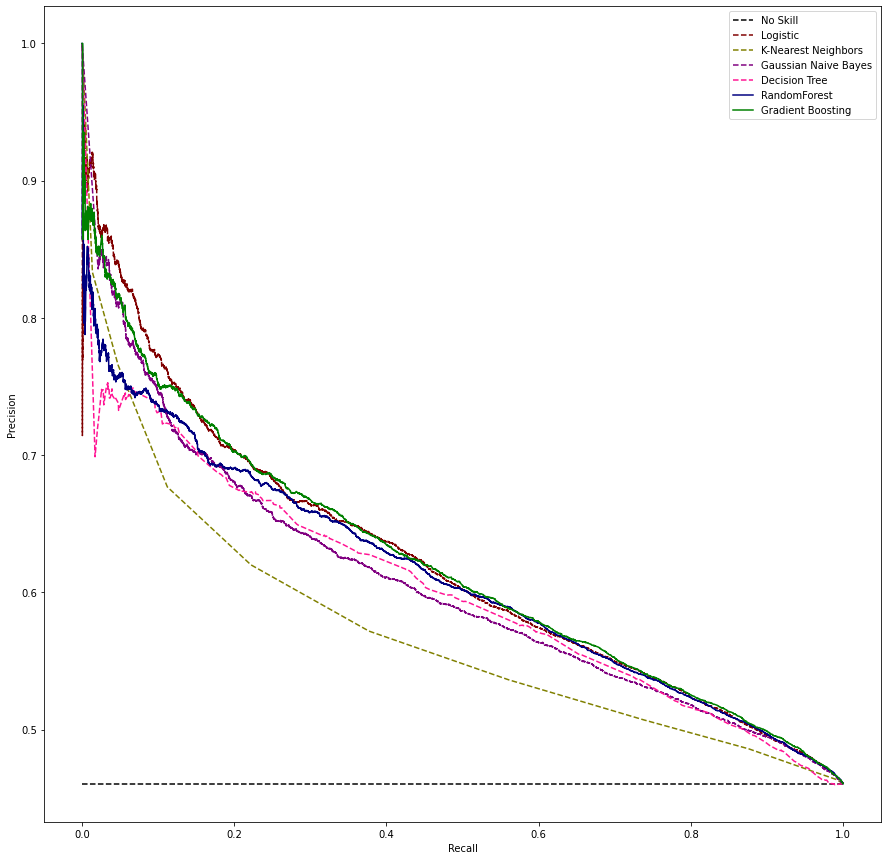

In [57]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

#No skill 
no_skill = len(y_test[y_test==1]) / len(y_test)

# Logistic regresion 
# predict class values
LR_yhat = clf.predict(X_test)
LR_precision, LR_recall, _ = precision_recall_curve(y_test, LR_probs)
LR_f1, LR_auc = f1_score(y_test, LR_yhat), auc(LR_recall, LR_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (LR_f1, LR_auc))

#SVM
svm_yhat = slf.predict(X_test)
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_probs)
svm_f1, svm_auc = f1_score(y_test, svm_yhat), auc(svm_recall, svm_precision)
print('Support Vector Machine: f1=%.3f auc=%.3f' % (svm_f1, svm_auc))

# K-Nearest Neighbor 
KNN_yhat = knn.predict(X_test)
KNN_precision, KNN_recall, _ = precision_recall_curve(y_test, KNN_probs)
KNN_f1, KNN_auc = f1_score(y_test, KNN_yhat), auc(KNN_recall, KNN_precision)
print('K- Nearest Neighbors: f1=%.3f auc=%.3f' % (KNN_f1, KNN_auc))

# Gaussian Naive Bayes
GNB_yhat = gnb.predict(X_test)
GNB_precision, GNB_recall, _ = precision_recall_curve(y_test,GNB_probs)
GNB_f1, GNB_auc = f1_score(y_test, GNB_yhat), auc(GNB_recall,GNB_precision)
print('Gaussian Naive Bayes: f1=%.3f auc=%.3f' % (GNB_f1, GNB_auc))

# Decision Tree 
decisiontree_yhat = dtc.predict(X_test)
decisiontree_precision, decisiontree_recall, _ = precision_recall_curve(y_test, decisiontree_probs)
decisiontree_f1, decisiontree_auc = f1_score(y_test, decisiontree_yhat), auc(decisiontree_recall, decisiontree_precision)
print('Decision Tree: f1=%.3f auc=%.3f' % (decisiontree_f1, decisiontree_auc))

# RandomForest 
randomforest_yhat = rfc.predict(X_test)
randomforest_precision, randomforest_recall, _ = precision_recall_curve(y_test, randomforest_probs)
randomforest_f1, randomforest_auc = f1_score(y_test, randomforest_yhat), auc(randomforest_recall, randomforest_precision)
print('RandomForest: f1=%.3f auc=%.3f' % (randomforest_f1, randomforest_auc))

#GradientBoosting Classifier 
GBC_yhat = rfc.predict(X_test)
GBC_precision, GBC_recall, _ = precision_recall_curve(y_test, GBC_probs)
GBC_f1, GBC_auc = f1_score(y_test, GBC_yhat), auc(GBC_recall, GBC_precision)
print('GraidentBoosting Classifier: f1=%.3f auc=%.3f' % (GBC_f1, GBC_auc))


# Ploting the precision-recall curves
pyplot.figure(figsize=(15,15))
pyplot.plot([0, 1], [no_skill, no_skill],color='black', linestyle='--', label='No Skill')
pyplot.plot(LR_recall, LR_precision,color='maroon', linestyle='--', label='Logistic')
pyplot.plot(svm_recall, svm_precision, color='red', linestyle='-', label='SVM')
pyplot.plot(KNN_recall, KNN_precision,color='olive', linestyle='--', label='K-Nearest Neighbors')
pyplot.plot(GNB_recall, GNB_precision,color='purple', linestyle='--', label='Gaussian Naive Bayes')
pyplot.plot(decisiontree_recall, decisiontree_precision, color='deeppink', linestyle='--', label='Decision Tree')
pyplot.plot(randomforest_recall, randomforest_precision, color='navy', linestyle='-', label='RandomForest')
pyplot.plot(GBC_recall, GBC_precision, color='green', linestyle='-', label='Gradient Boosting')

pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
pyplot.show()